In [1]:
# Install & Import SHAP
# !pip install shap

import shap
import pandas as pd
import joblib

c:\Users\Queen\Desktop\ml-portfolio-Hoda\churn-prediction-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Final Model & Data
model = joblib.load("../models/churn_random_forest_model.pkl")

df = pd.read_csv("../data/processed/clean_telco_churn.csv")

X = df.drop(columns=["Churn"])

In [5]:
# Initialize SHAP Explainer (Tree Models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

type(shap_values)


numpy.ndarray

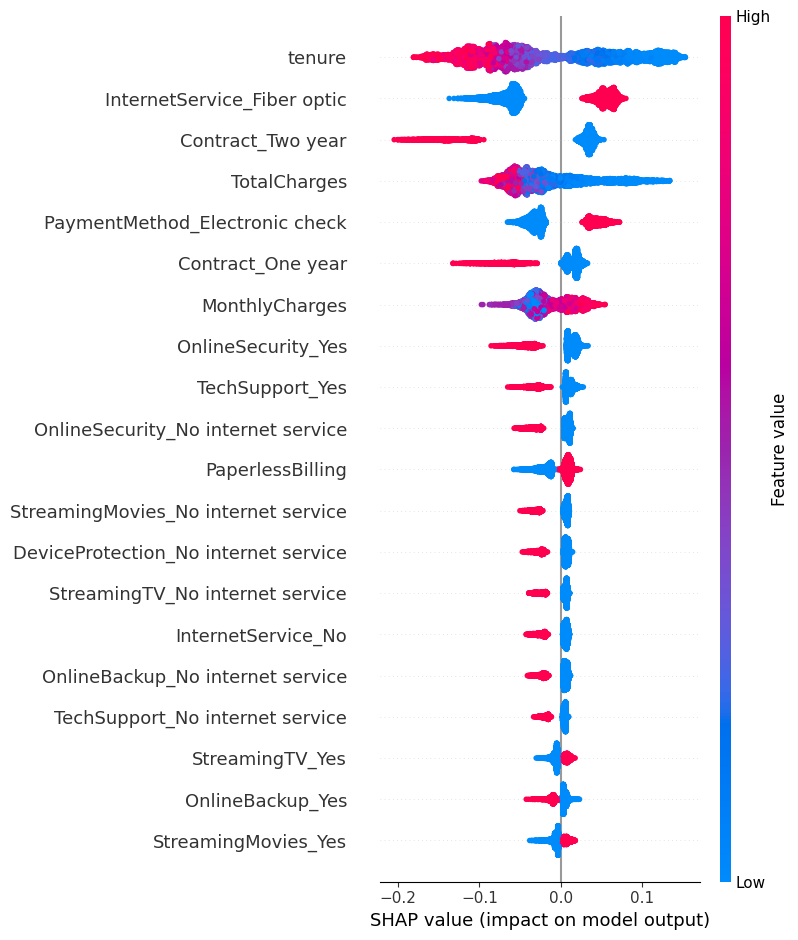

In [13]:
# Global Feature Importance

import numpy as np
# Handle different SHAP output formats safely
# Normalize SHAP output for binary classification
if isinstance(shap_values, list):
    shap_values_churn = shap_values[1]
else:
    shap_values_churn = shap_values[:, :, 1]

# Safety check
assert shap_values_churn.shape == X.shape
shap.summary_plot(shap_values_churn, X)


# This answers: “What features matter most overall?”

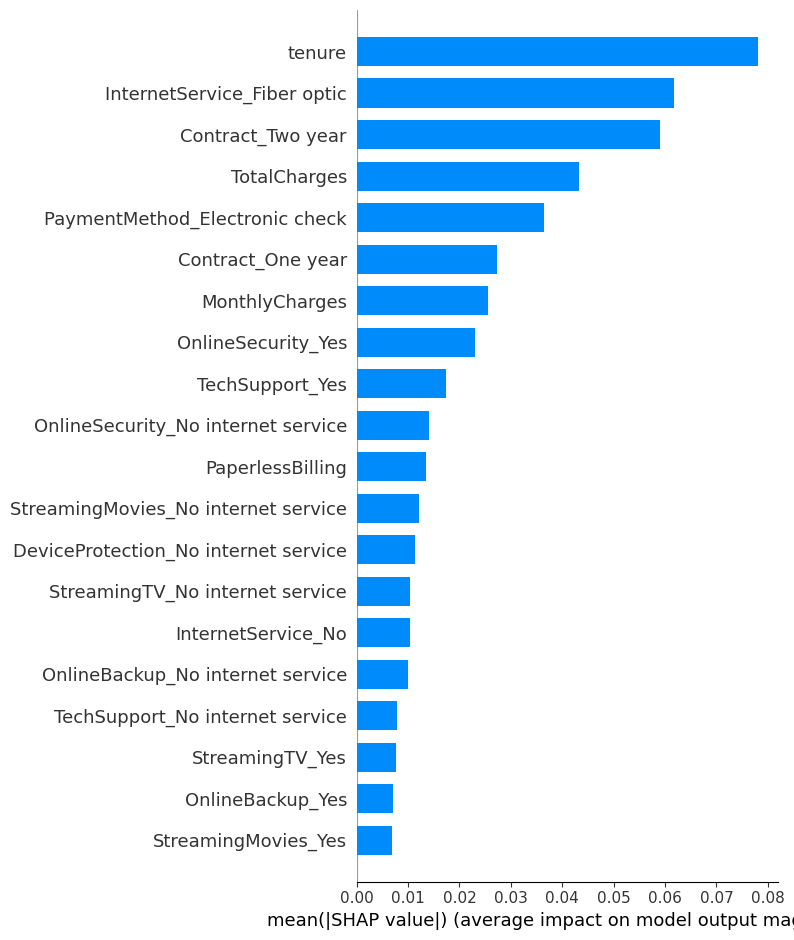

In [14]:
# Feature Impact Direction
shap.summary_plot(shap_values_churn, X, plot_type="bar")

# This gives: Ranked importance - Easy business explanation

In [21]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values_churn, X, show=False)

plt.savefig("../assets/shap_summary.png", bbox_inches="tight")
plt.close()

In [23]:
# Explain ONE Customer Prediction

# Pick a customer:
customer_index = 0

shap.force_plot(
    explainer.expected_value[1],
    shap_values_churn[customer_index],
    X.iloc[customer_index]
)

# This shows: “Why did the model flag THIS customer as a churn risk?”

<Figure size 640x480 with 0 Axes>

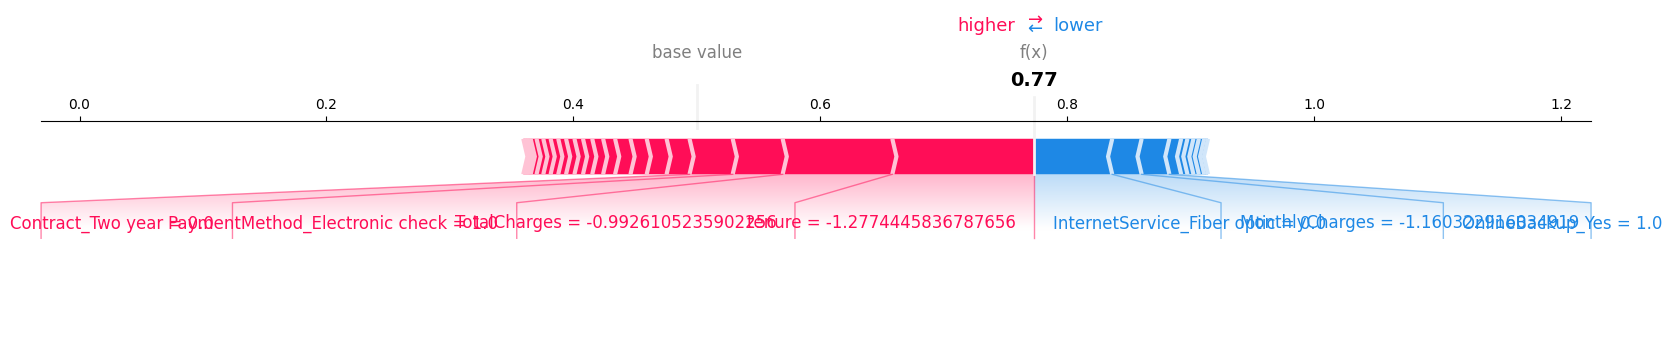

In [ ]:
# Explain Customer Prediction ver 2

import matplotlib.pyplot as plt
import shap

shap.initjs()  # safe even if it doesn't render inline

# Force plot saved as image
plt.figure()
shap.force_plot(
    explainer.expected_value[1],
    shap_values_churn[customer_index],
    X.iloc[customer_index],
    matplotlib=True
)
plt.savefig("../assets/shap_force_customer.png", bbox_inches="tight")
plt.close()


## 🔍 Model Explainability (SHAP)

SHAP was used to explain the predictions of the final Random Forest model.

### Key Findings:
- Customer tenure is the strongest predictor of churn.
- Month-to-month contracts significantly increase churn risk.
- Higher monthly charges contribute positively to churn probability.
- Long-term contracts and longer tenure reduce churn likelihood.

SHAP enables both global and local interpretability, making the model more transparent and suitable for business decision-making.